In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

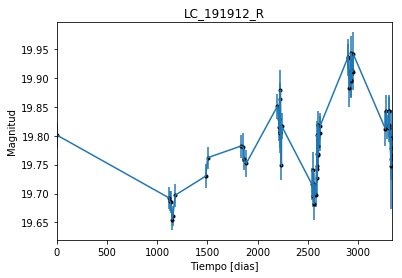

In [2]:
 data = np.genfromtxt('LC_191912_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191912_R')
plt.savefig("LC_191912_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

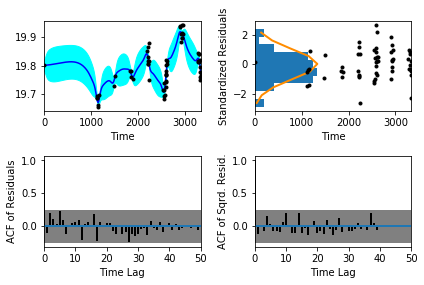

In [5]:
sample.assess_fit()

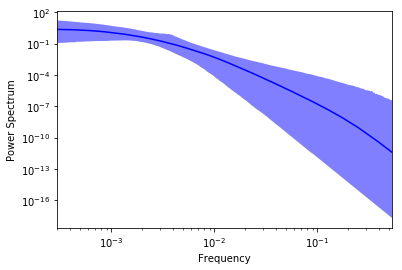

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

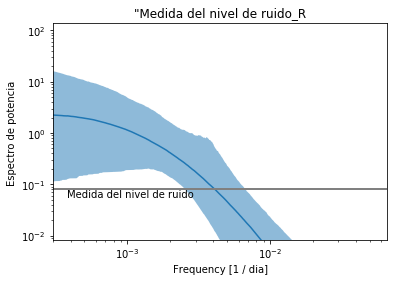

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191912_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191912_R')

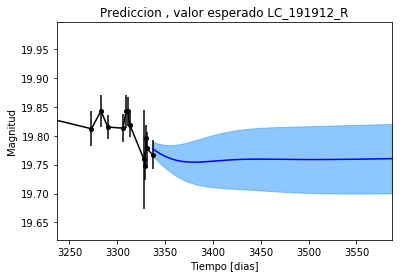

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191912_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191912_R')

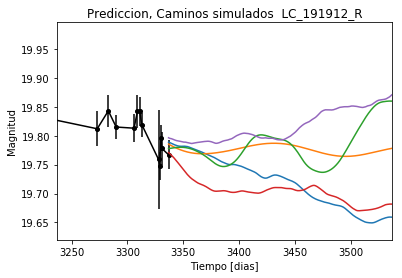

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191912_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


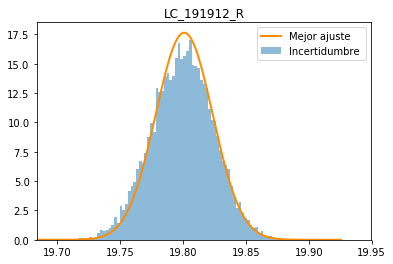

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191912_R')
plt.savefig("Mejor_ajuste_LC_191912_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191912_R')

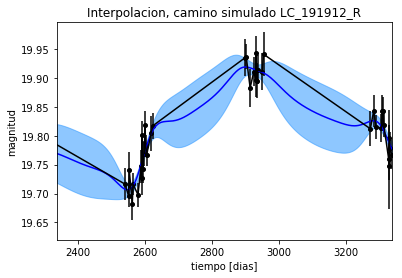

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_R')

Text(0.5,1,'Interpolacion, camino simulado LC_191912_R')

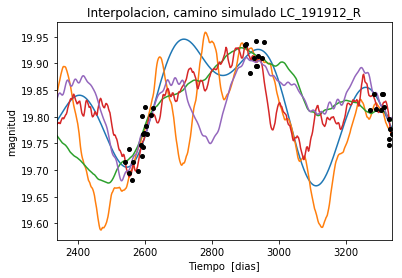

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 345.900781577
Median: 0.0113950228985
Standard deviation: 0.200329039118
68% credibility interval: [ 0.00090141  0.19718592]
95% credibility interval: [  3.53785292e-04   7.85071086e-01]
99% credibility interval: [  3.10565948e-04   9.84215527e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 294.713628848
Median: 0.00246184655063
Standard deviation: 0.0990370964838
68% credibility interval: [ 0.00055265  0.02919024]
95% credibility interval: [ 0.00032333  0.31261638]
99% credibility interval: [  3.04079025e-04   7.05609232e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 281.630600568
Median: 0.0183005292114
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1103.00321718
Median: 148.529707334
Standard deviation: 1.70531333463
68% credibility interval: [ 146.61955801  149.67193533]
95% credibility interval: [ 143.73513062  150.3640157 ]
99% credibility interval: [ 141.59110017  150.62071902]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 319.846070697
Median: 0.795647207488
Standard deviation: 2.21058961404
68% credibility interval: [ 0.08184721  3.98921333]
95% credibility interval: [ 0.02020868  7.63091032]
99% credibility interval: [  0.01227837  10.63155822]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 351.944505848
Median: 0.342615264672
Standard deviation: 9.52200846306
68% credibility interval: [ 0.01684463  8.83954937]
95% credibility interval: [  1.40605067e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19998.0706641
Median: 1.04242778674e-25
Standard deviation: 7.66568253475e+112
68% credibility interval: [  4.80690893e-74   1.84890500e+00]
95% credibility interval: [  6.66182588e-109   2.02404362e+104]
99% credibility interval: [  4.32106921e-124   5.12953259e+109]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2703.88783148
Median: 19.7871167577
Standard deviation: 0.0409577335743
68% credibility interval: [ 19.753438    19.81675691]
95% credibility interval: [ 19.70355829  19.86479619]
99% credibility interval: [ 19.64286927  19.91510831]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 586.3492564
Median: 0.00431849456963
Standard deviation: 0.254493132592
68% credibility interval: [ 0.          0.36005274]
95% credibility interval: [ 0.         0.8920275]
99% credibility interval: [ 0.          1.02162589]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 586.3492564
Median: 0.00431849456963
Standard deviation: 0.254493132592
68% credibility interval: [ 0.          0.36005274]
95% credibility interval: [ 0.         0.8920275]
99% credibility interval: [ 0.          1.02162589]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1151.51900754
Median: 0.0
Standard deviation: 0.000876658431454
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1103.00321718
Median: 148.529707334
Standard deviation: 1.70531333463
68% credibility interval: [ 146.61955801  149.67193533]
95% credibility interval: [ 143.73513062  150.3640157 ]
99% credibility interval: [ 141.59110017  150.62071902]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1921.46466651
Median: 0.00707665211383
Standard deviation: 0.0101545683189
68% credibility interval: [ 0.00416538  0.01330761]
95% credibility interval: [ 0.00266513  0.03054017]
99% credibility interval: [ 0.00205066  0.05963516]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1820.3023344
Median: 0.955072487652
Standard deviation: 0.151804985691
68% credibility interval: [ 0.8228302  1.1168615]
95% credibility interval: [ 0.71702959  1.31026334]
99% credibility interval: [ 0.66380152  1.454561  ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 537.502472968
Median: 7.86322701177e-05
Standard deviation: 0.0468108849921
68% credibility interval: [  1.90326112e-07   3.44206543e-03]
95% credibility interval: [  9.35310083e-109   4.80419189e-002]
99% credibility interval: [  1.33476176e-114   3.27341659e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 345.900781577
Median: (-0.0715970404506-1.57297033055j)
Standard deviation: 2.03500023055
68% credibility interval: [-1.23895568-0.33940335j -0.00566370-0.0278021j ]
95% credibility interval: [ -4.93274711e+00+0.j          -2.22289855e-03-0.00099437j]
99% credibility interval: [ -6.18400854e+00+0.j          -1.95134340e-03-0.00126265j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 294.713628848
Median: (-0.0154682380755+2.69214003191j)
Standard deviation: 1.71584002192
68% credibility interval: [-0.18340768+0.68437085j -0.00347241+0.0021168j ]
95% credibility interval: [-1.96422662+4.88197781j -0.00203156+0.05469534j]
99% credibility interval: [ -4.43347356e+00 +3.94140301e+00j  -1.91058486e-03 +1.37966195e-03j]
Post